# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 631


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cloquet
Processing Record 3 of Set 1 | guder
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | stromness
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | road town
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | bendigo
Processing Record 11 of Set 1 | itoman
Processing Record 12 of Set 1 | hanzhong
Processing Record 13 of Set 1 | gurskoye
City not found. Skipping...
Processing Record 14 of Set 1 | belmonte
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | macduff
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | puerto baquerizo moreno
Processing Record 19 of Set 1 | coquimbo
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | kapaa
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,58.80,71,75,12.10,NZ,1680574068
1,cloquet,46.7216,-92.4594,32.38,90,100,12.66,US,1680573878
2,guder,8.9667,37.7667,59.40,83,97,1.88,ET,1680574068
3,stromness,58.9650,-3.2960,39.16,77,100,5.35,GB,1680574068
4,punta arenas,-53.1500,-70.9167,41.11,75,40,4.61,CL,1680574069


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,58.80,71,75,12.10,NZ,1680574068
1,cloquet,46.7216,-92.4594,32.38,90,100,12.66,US,1680573878
2,guder,8.9667,37.7667,59.40,83,97,1.88,ET,1680574068
3,stromness,58.9650,-3.2960,39.16,77,100,5.35,GB,1680574068
4,punta arenas,-53.1500,-70.9167,41.11,75,40,4.61,CL,1680574069


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

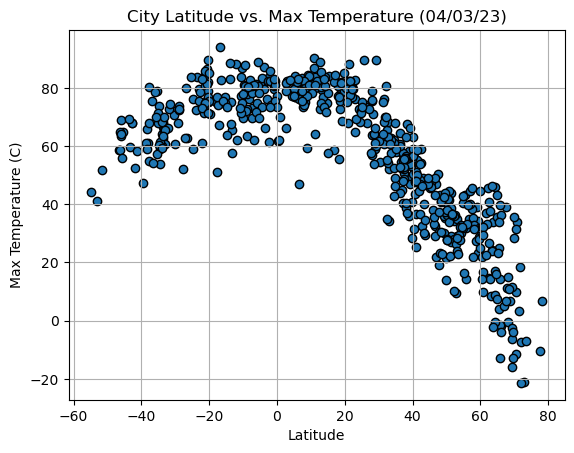

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime("%x")) 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

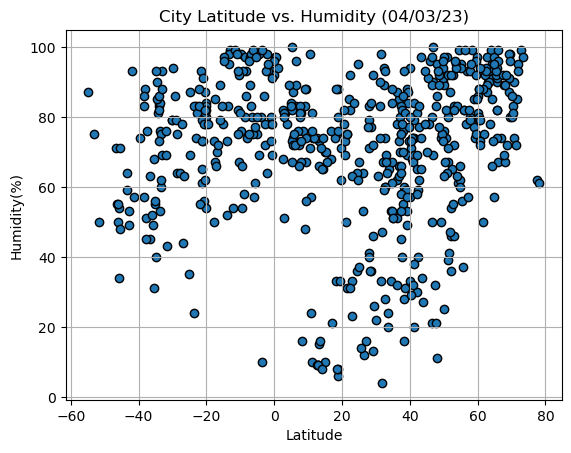

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors="black" )

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (%s)' % time.strftime("%x")) 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

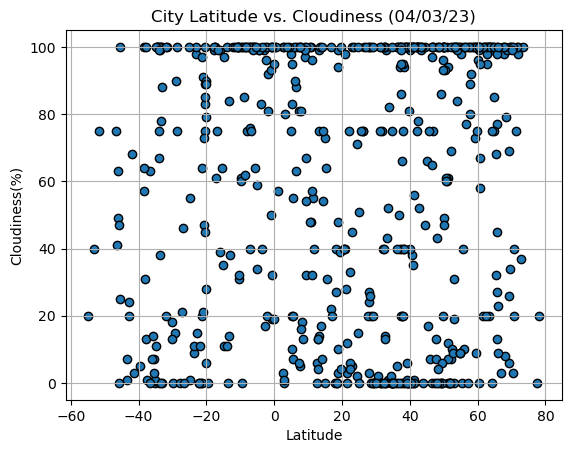

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (%s)' %time.strftime("%x")) 
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

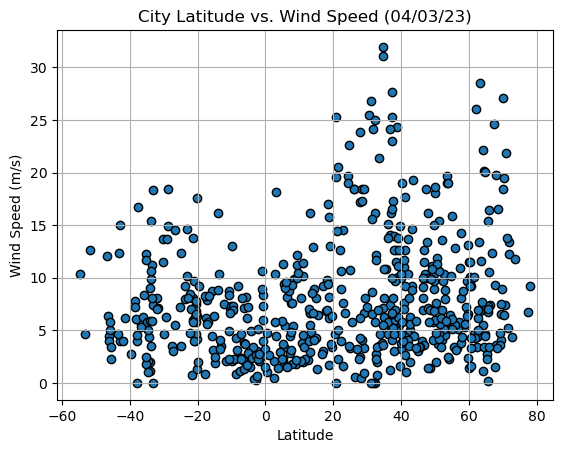

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (%s)' %time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.7200800377390714


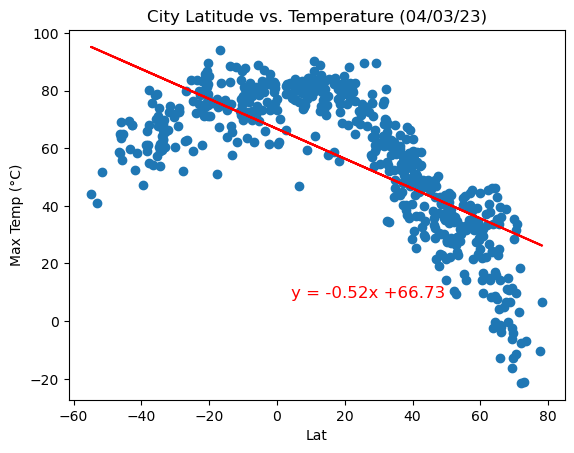

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Latitude Vs. Temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (4,8), fontsize = 12, color = "red")

plt.xlabel('Lat')
plt.ylabel('Max Temp (°C)')
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.07692839419693093


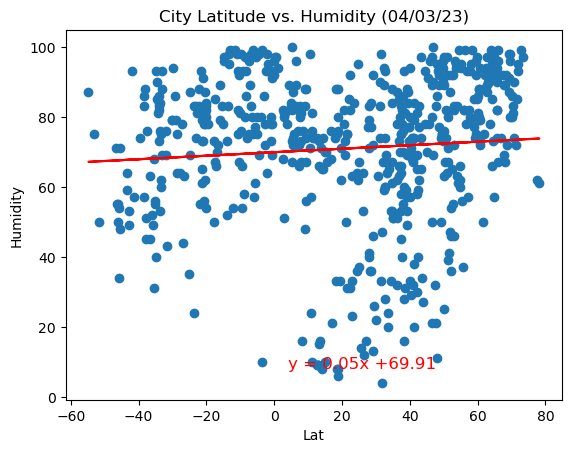

In [13]:
# Latitude Vs. Humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (4,8), fontsize = 12, color = "red")

plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.07723647529305783


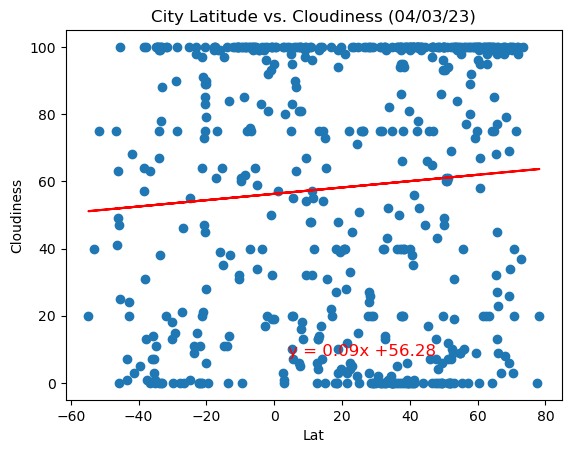

In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Latitude Vs. Cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (4,8), fontsize = 12, color = "red")

plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.18740396763651518


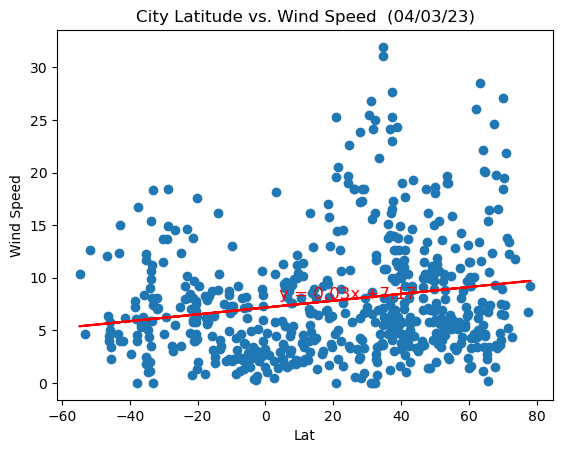

In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
# Latitude vs. Wind Speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) +"x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (4,8), fontsize = 12, color = "red")

plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.title("City Latitude vs. Wind Speed  (%s)" % time.strftime("%x"))
print(f'The r-value is: {rvalue}')

plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cloquet,46.7216,-92.4594,32.38,90,100,12.66,US,1680573878
2,guder,8.9667,37.7667,59.40,83,97,1.88,ET,1680574068
3,stromness,58.9650,-3.2960,39.16,77,100,5.35,GB,1680574068
5,road town,18.4167,-64.6167,77.09,75,0,17.02,VG,1680574069
6,albany,42.6001,-73.9662,54.01,62,100,4.99,US,1680574060


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,58.80,71,75,12.10,NZ,1680574068
4,punta arenas,-53.1500,-70.9167,41.11,75,40,4.61,CL,1680574069
8,bendigo,-36.7667,144.2833,75.63,45,63,5.61,AU,1680573824
11,belmonte,-15.8631,-38.8828,74.89,89,99,8.77,BR,1680574069
12,mataura,-46.1927,168.8643,58.48,50,49,4.45,NZ,1680574069


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8924195326969495


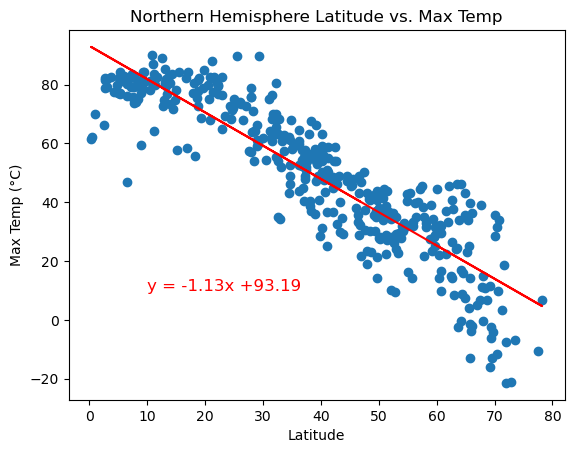

In [18]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Latitude vs. Max Temp
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (10,10), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (°C)')
plt.title('Northern Hemisphere Latitude vs. Max Temp')
print(f'The r-value is: {rvalue}')

plt.show()


The r-value is: 0.6193150028197296


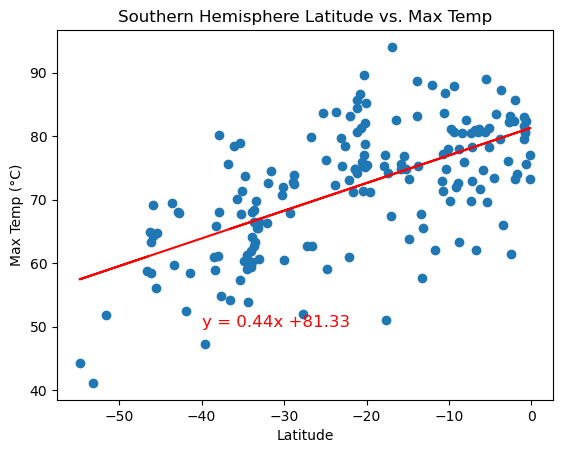

In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
# Latitude vs. Max Temp
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (-40, 50), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp (°C)')
plt.title('Southern Hemisphere Latitude vs. Max Temp')
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a downhill /negative linear relationship between latitude & max temp in the northern hemisphere (r-value: -0.9074546121294434.) while there's a positive (moderate) linear relationship between latitude & max temp in the southern hemisphere (r-value: 0.6268073179508783).


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2912078549420866


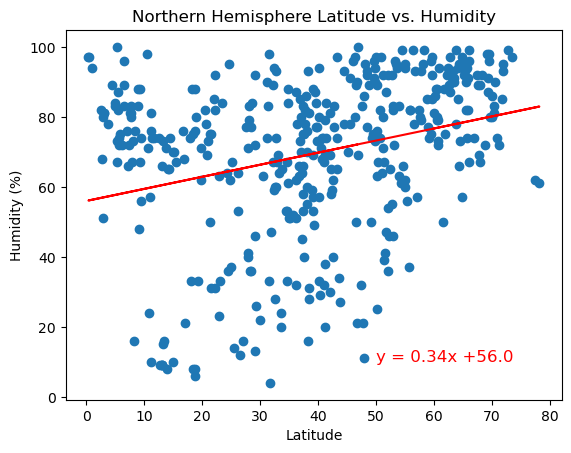

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
# Latitude vs. Humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (50,10), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.3877492430097844


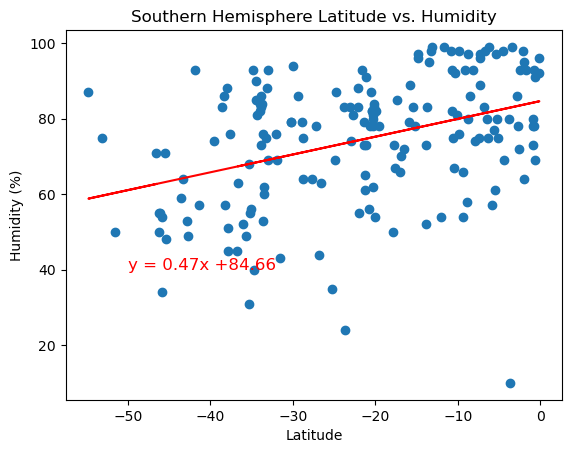

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
# Latitude vs. Humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (-50,40), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak positive linear relationship between latitude & humidity in the northern hemisphere (r-value: 0.262378506381244.) while there's a positive (in between weak & moderate) linear relationship between latitude & humidity in the southern hemisphere (r-value: 0.46107830142183226).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.13350544959310673


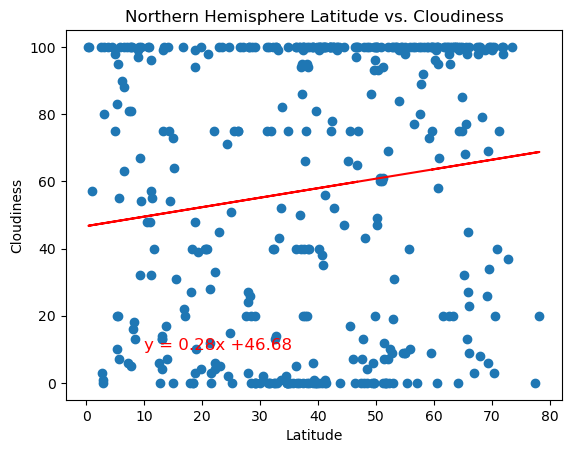

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
# Latitude vs. Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (10,10), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: 0.32828485983620903


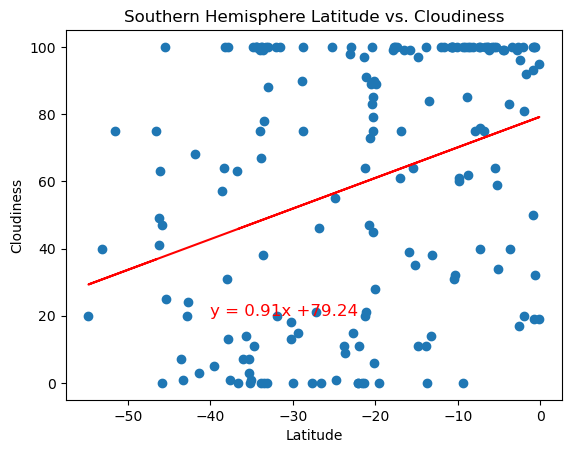

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
# Latitude vs. Cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (-40,20), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak positive linear relationship between latitude & cloudiness in the northern hemisphere (r-value: 0.27489648810357503.) while there's a positive (in between weak & moderate) linear relationship between latitude & cloudiness in the southern hemisphere (r-value: 0.4189902748191879).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12042054787623155


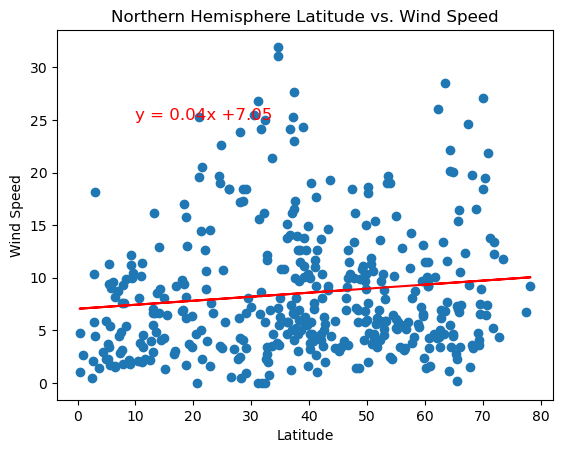

In [24]:
# Northern Hemisphere
# YOUR CODE HERE
# Latitude vs. Wind Speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (10,25), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
print(f'The r-value is: {rvalue}')

plt.show()

The r-value is: -0.25529255292608655


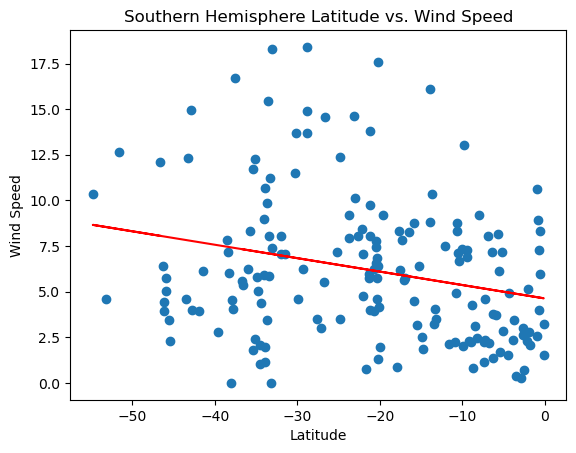

In [25]:
# Southern Hemisphere
# YOUR CODE HERE
# Latitude vs. Wind Speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regressValues = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValues, "r-")

plt.annotate(line_eq, (-40,20), fontsize = 12, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
print(f'The r-value is: {rvalue}')

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is a weak positive linear relationship between latitude & wind speed in the northern hemisphere (r-value: 0.14240829612326708.) while there's a weak negative linear relationship between latitude & wind speed in the southern hemisphere (r-value: -0.28639305074894383).